In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import csv
import numpy as np
import pandas as pd
import smbclient
smbclient.ClientConfig(username = 'harshavardanbn', password = 'thesleepersinthatquietearth')
import warnings
warnings.filterwarnings('ignore')

# File details

In [2]:
#location = "D:/Harshavardan/data"
location = "//storage.ncbs.res.in/harshavardanbn/classical_conditioning/shock_us/210803/F1"
files = 111

# Is the code being run on Linux?

In [3]:
linux = True

# Functions to convert Bonsai metadata to timestamp

In [4]:
def converttime(time):
    #offset = time & 0xFFF
    cycle1 = (time >> 12) & 0x1FFF
    cycle2 = (time >> 25) & 0x7F
    seconds = cycle2 + cycle1 / 8000.
    return seconds

def uncycle(time):
    cycles = np.insert(np.diff(time) < 0, 0, False)
    cycleindex = np.cumsum(cycles)
    return time + cycleindex * 128

# Load and plot all rawmotionx.csv, timestampx.csv, csx.csv and usx.csv

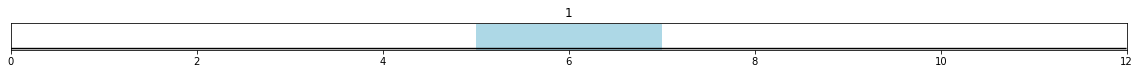

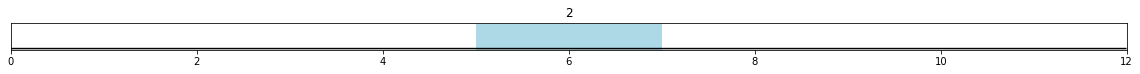

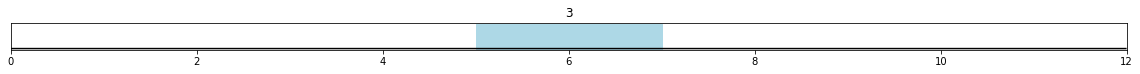

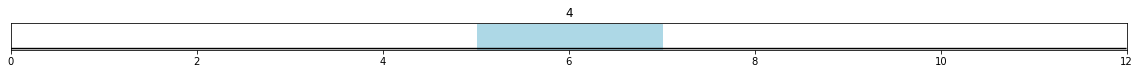

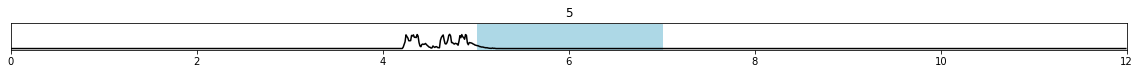

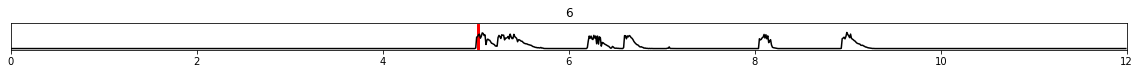

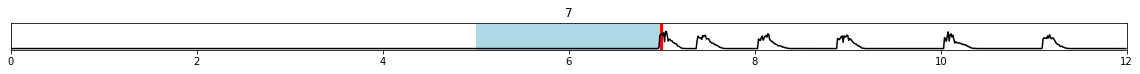

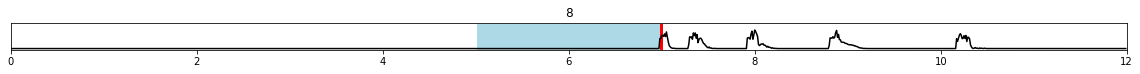

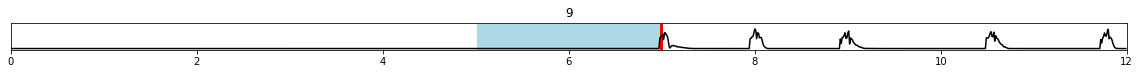

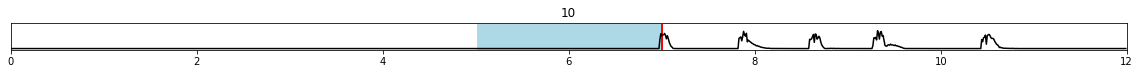

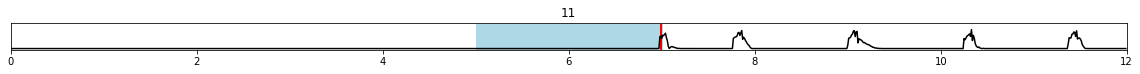

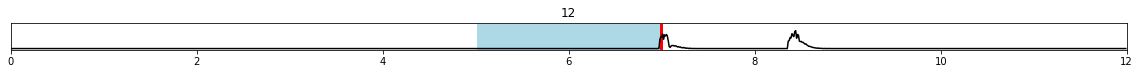

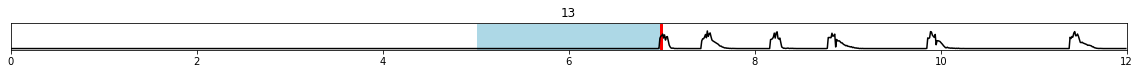

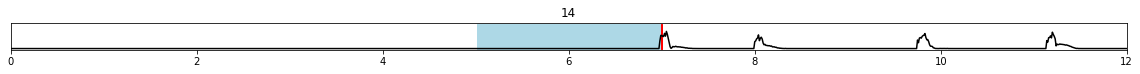

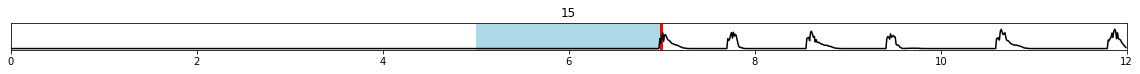

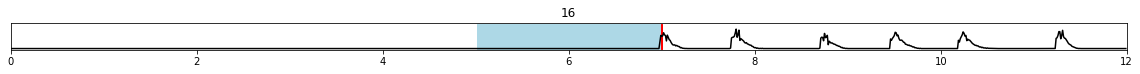

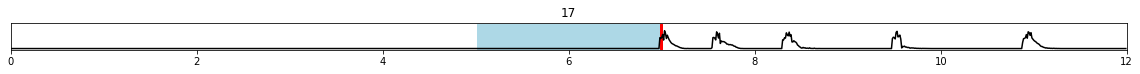

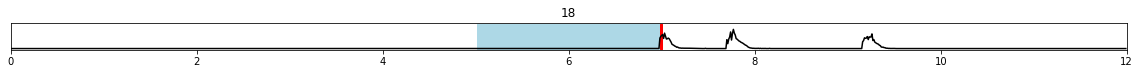

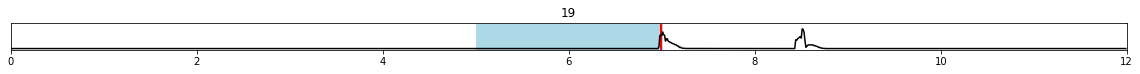

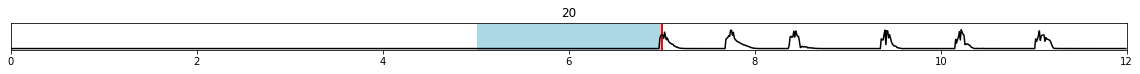

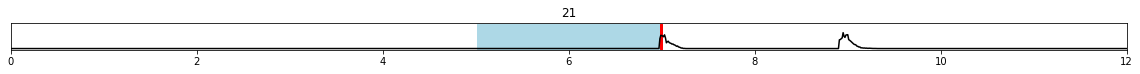

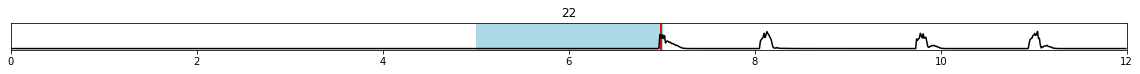

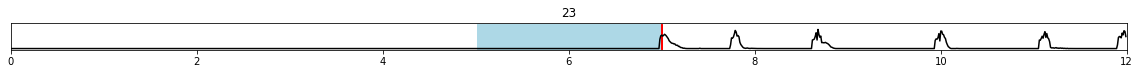

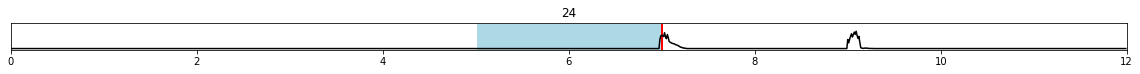

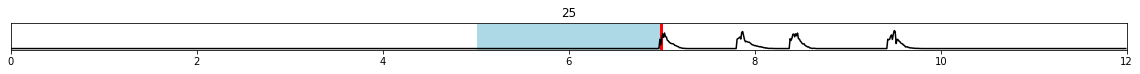

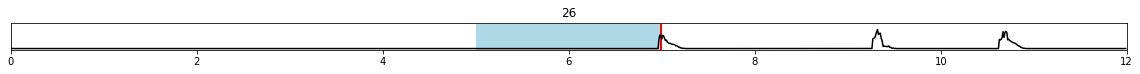

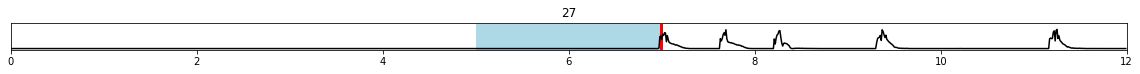

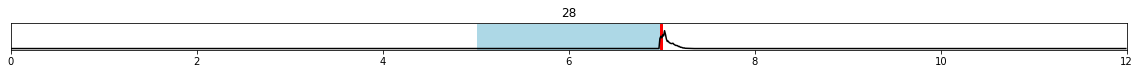

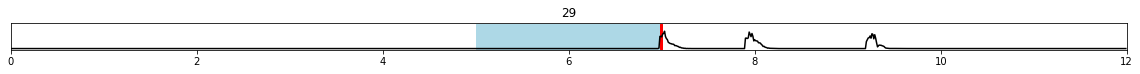

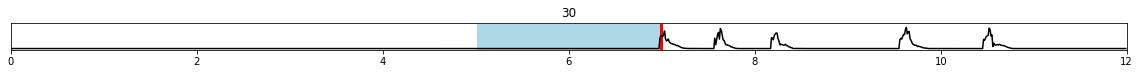

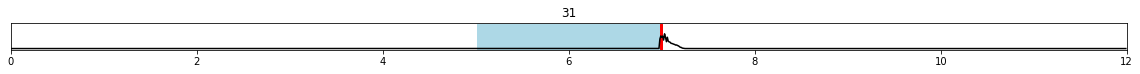

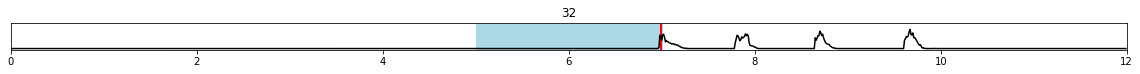

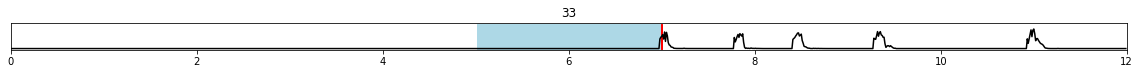

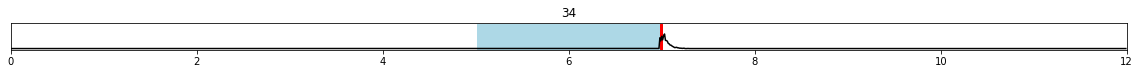

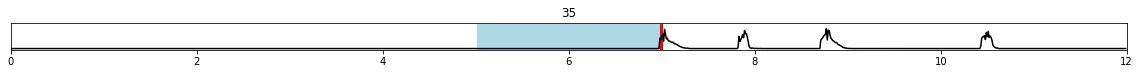

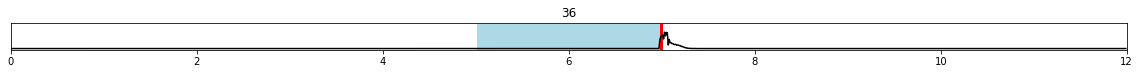

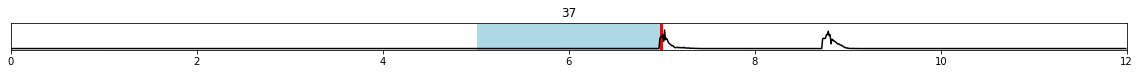

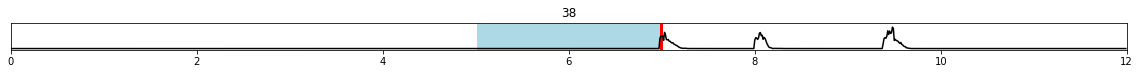

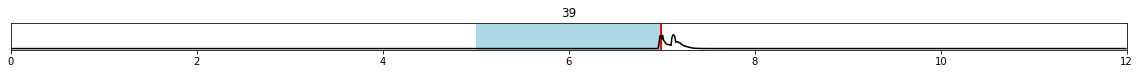

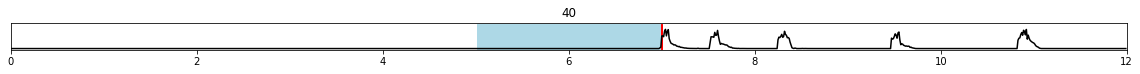

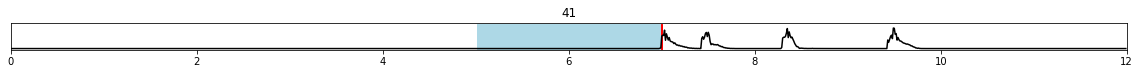

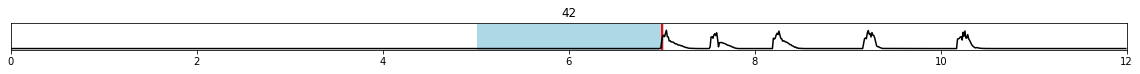

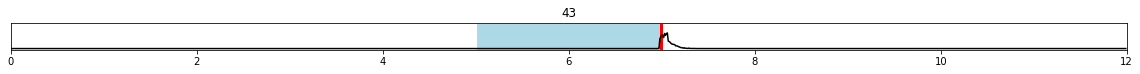

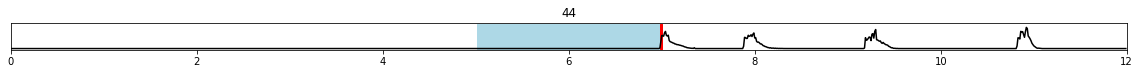

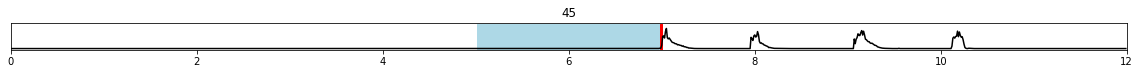

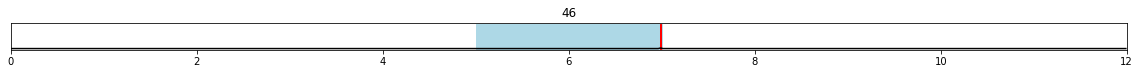

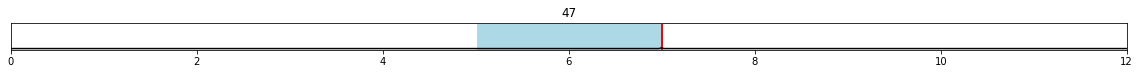

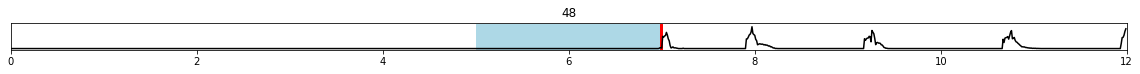

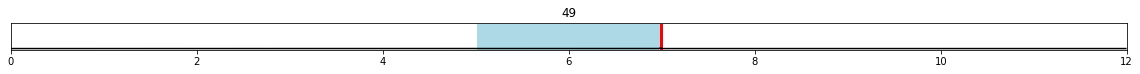

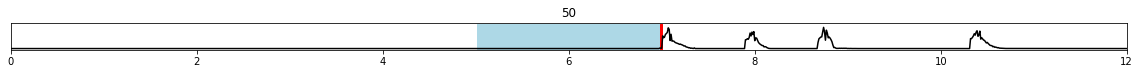

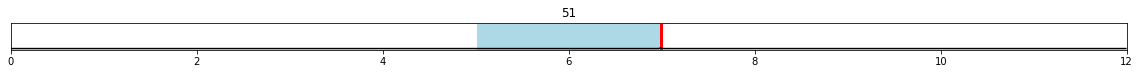

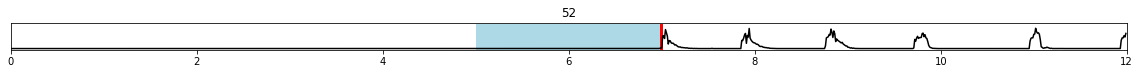

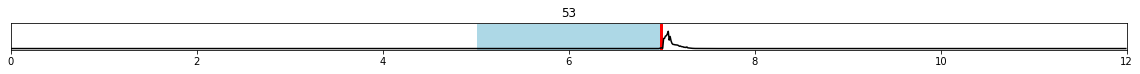

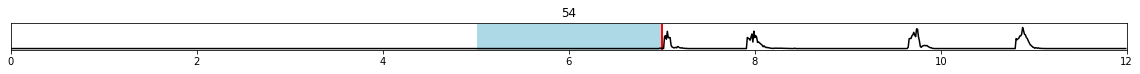

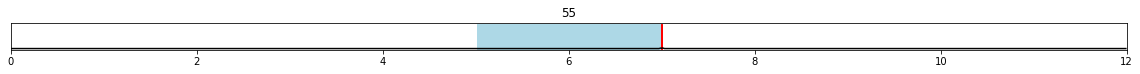

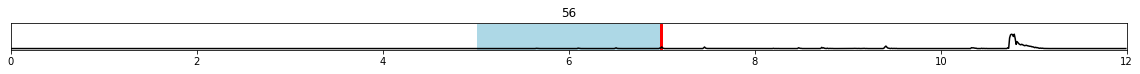

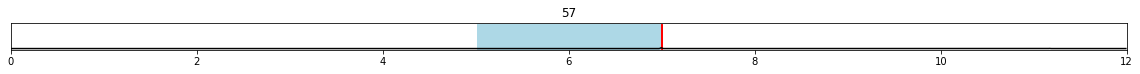

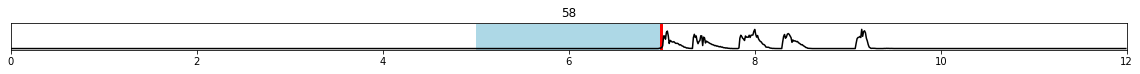

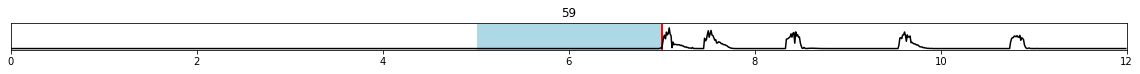

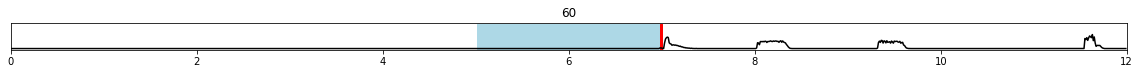

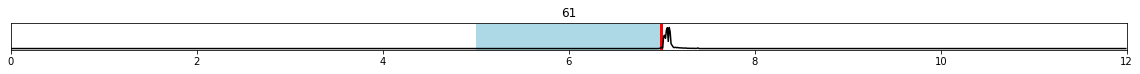

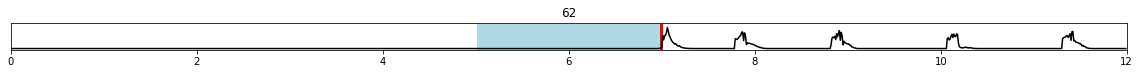

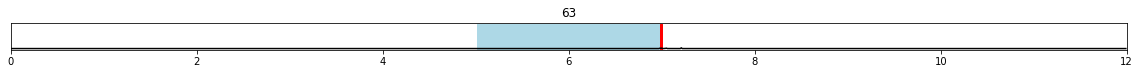

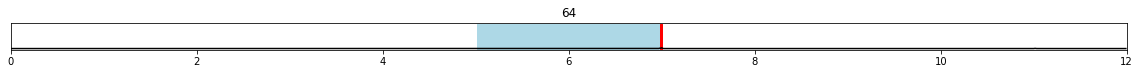

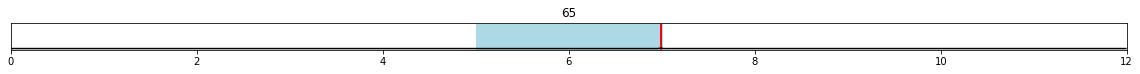

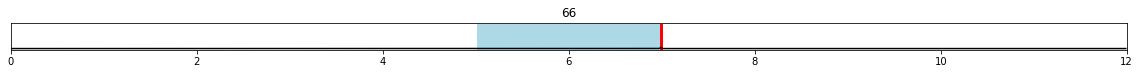

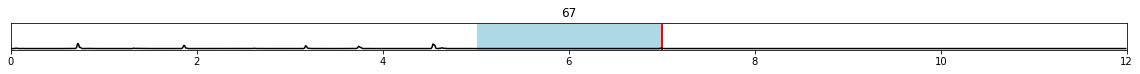

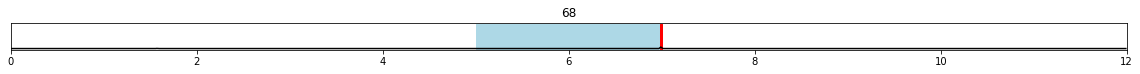

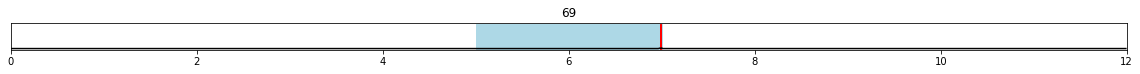

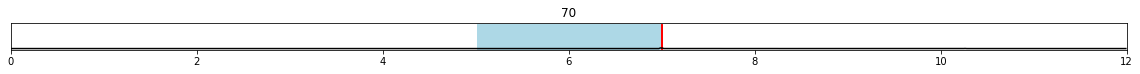

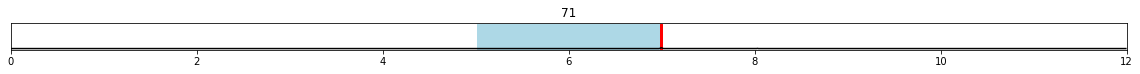

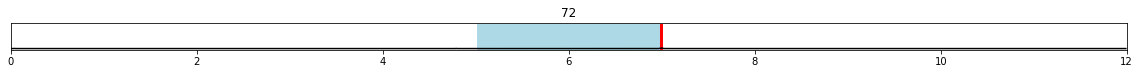

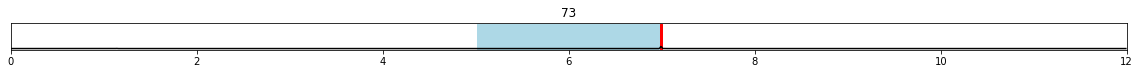

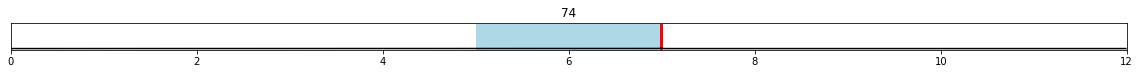

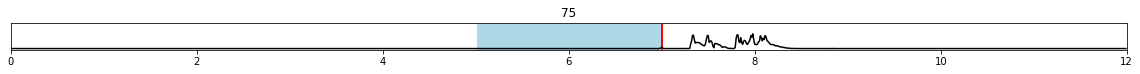

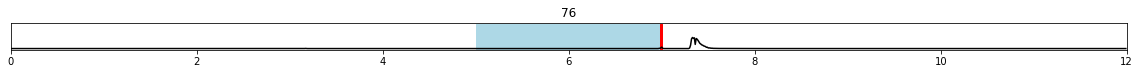

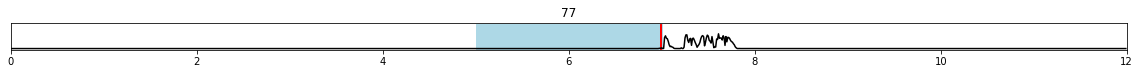

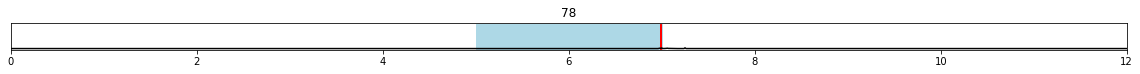

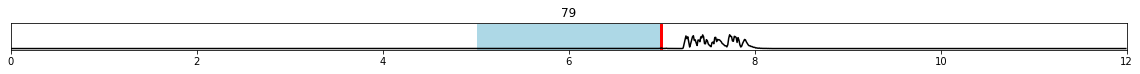

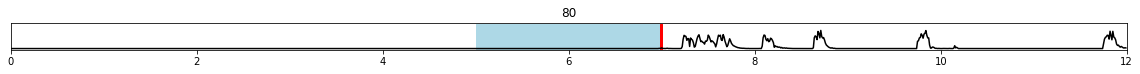

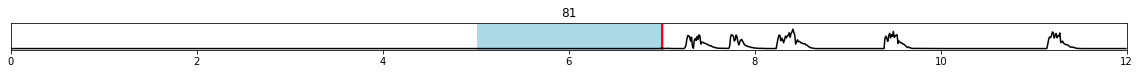

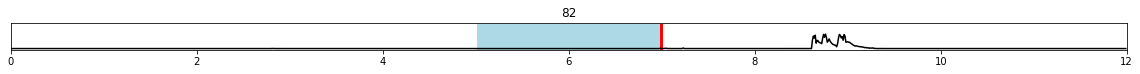

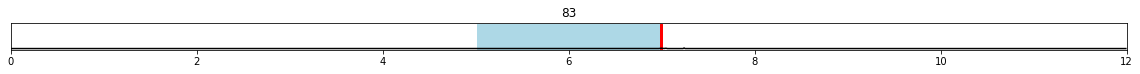

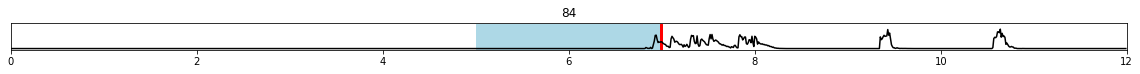

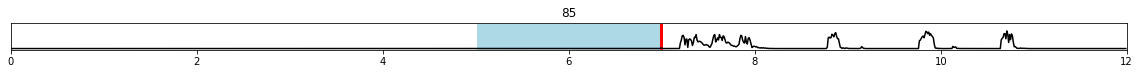

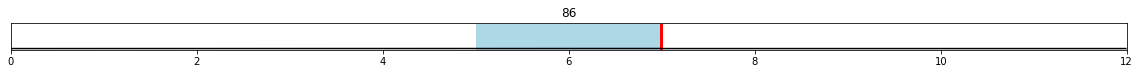

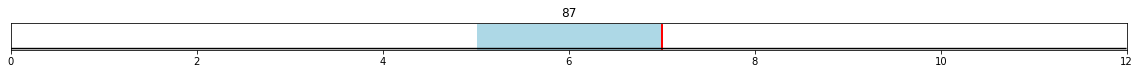

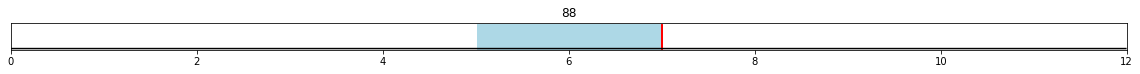

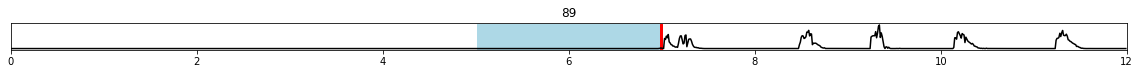

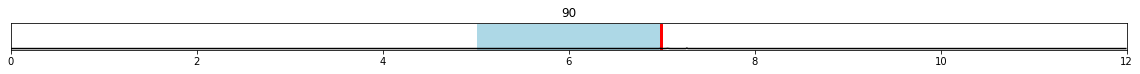

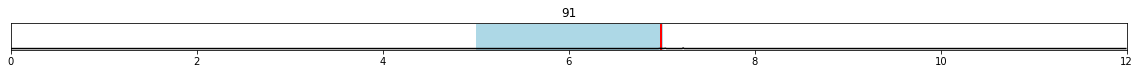

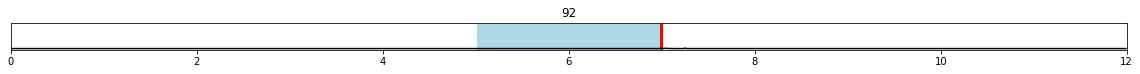

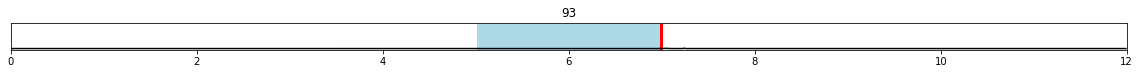

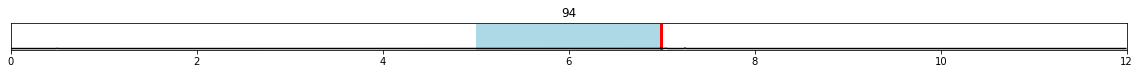

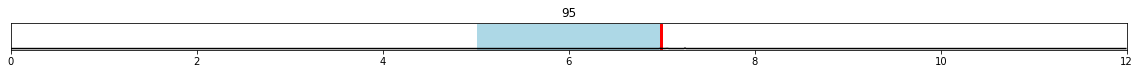

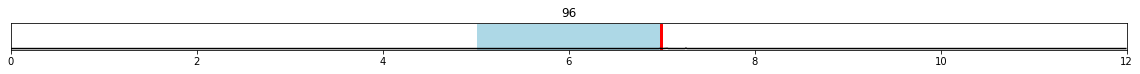

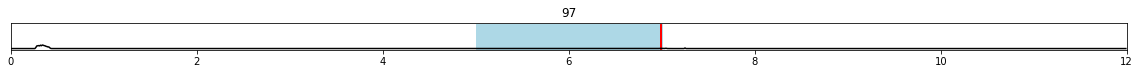

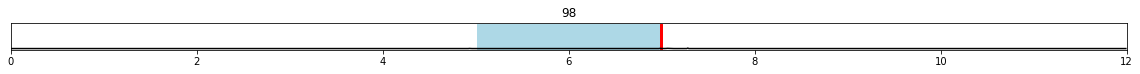

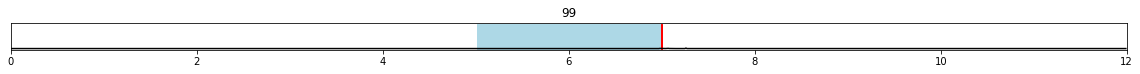

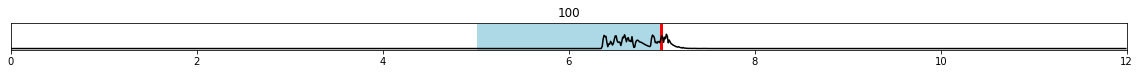

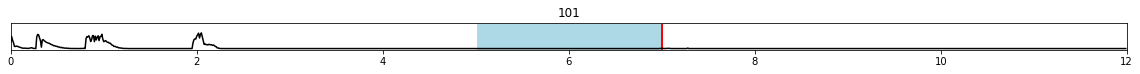

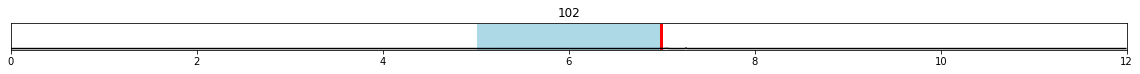

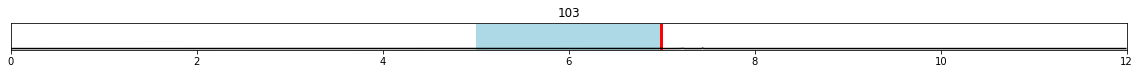

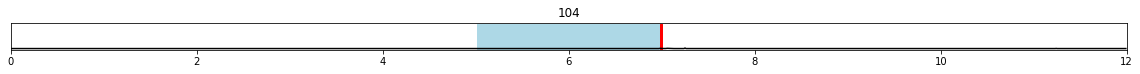

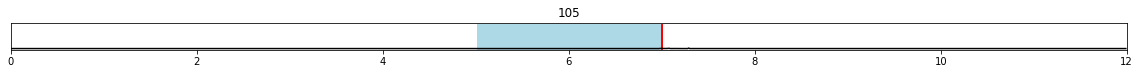

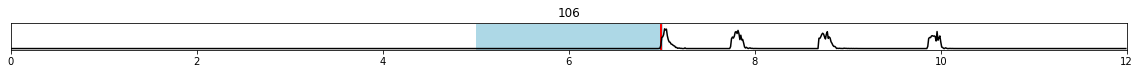

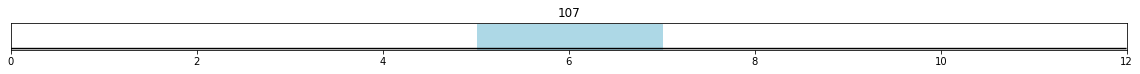

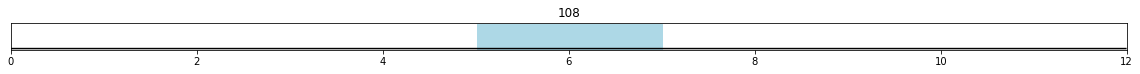

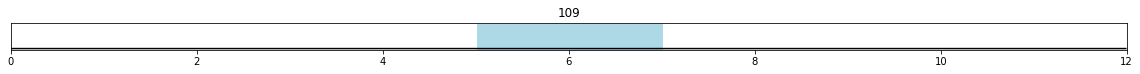

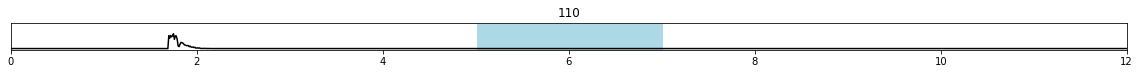

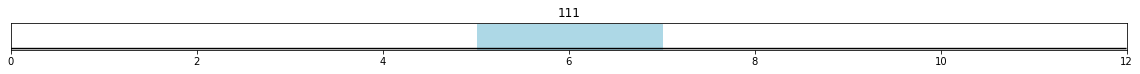

In [5]:
motion = []
time = []
cs = []
us = []
cs_start = []
cs_end = []
us_start = []
us_end = []
ylim = 8
dur = 1200

if linux:

    for i in range(1, files + 1):
        
        temp = []
        with smbclient.open_file(location + "/rawmotion" + str(i) + ".csv", mode = "r") as file:
            reader = csv.reader(file)
            for row in reader:
                temp.append(float(row[0]))
        
        motion.append(temp[:dur])
        
        temp = []
        with smbclient.open_file(location + "/timestamp" + str(i) + ".csv", mode = "r") as csv_file:
            csv_reader = csv.reader(csv_file, delimiter = ",")
            for row in csv_reader:
                temp.append(converttime(int(row[0])))
                
        temp = uncycle(temp)
        temp = np.array(temp)
        temp = temp - temp[0]
        time.append(temp[:dur])
        
        temp = []
        with smbclient.open_file(location + "/cs" + str(i) + ".csv", mode = "r") as file:
            reader = csv.reader(file)
            for row in reader:
                temp.append(float(row[0]))
                if len(temp) > 1:
                    if (temp[-1] > temp[-2]):
                        cs_start.append(len(temp) - 1)
                    elif (temp[-2] > temp[-1]):
                        cs_end.append(len(temp) - 2)
        
        if 1 not in temp:
            cs_start.append(-1)
            cs_end.append(-1)
        cs.append(temp[:dur])
        
        temp = []
        with smbclient.open_file(location + "/us" + str(i) + ".csv", mode = "r") as file:
            reader = csv.reader(file)
            for row in reader:
                temp.append(float(row[0]))
                if len(temp) > 1:
                    if (temp[-1] > temp[-2]):
                        us_start.append(len(temp) - 1)
                    elif (temp[-2] > temp[-1]):
                        us_end.append(len(temp) - 2)
        
        if 1 not in temp:
            us_start.append(-1)
            us_end.append(-1)
        us.append(temp[:dur])
        
        #plot stuff        
        plt.figure(figsize = (20, 0.5))
        plt.plot(time[-1][:], motion[-1][:], "k")
        plt.xlim(0, 12)
        plt.title(i)
        plt.yticks([])
        if i < 6:
            plt.fill_between([time[-1][cs_start[-1]], time[-1][cs_end[-1]]], 
                             [ylim, ylim], color = "lightblue")
        elif i == 6:
            plt.fill_between([time[-1][us_start[-1]], time[-1][us_end[-1]]],
                             [ylim, ylim], color = "red")
        elif i < 107:
            plt.fill_between([time[i - 1][cs_start[i - 1]], time[i - 1][cs_end[i - 1]]],
                             [ylim, ylim], color = "lightblue")
            plt.fill_between([time[-1][us_start[-1]], time[-1][us_end[-1]]],
                             [ylim, ylim], color = "red")
        else:
            plt.fill_between([time[i - 1][cs_start[i - 1]], time[i - 1][cs_end[i - 1]]],
                             [ylim, ylim], color = "lightblue")
    motion = np.array(motion)

else:
    
    for i in range(1, files + 1):
        temp = []
        with open(location + "/rawmotion" + str(i) + ".csv", "r") as file:
            reader = csv.reader(file)
            for row in reader:
                temp.append(float(row[0]))
        motion.append(temp[:1200])
        plt.figure(figsize = (20, 0.5))
        plt.plot(motion[-1][:], "k")
        plt.xlim(0, 1200)
        #plt.ylim(0, 0.1)
        plt.title(i)
        if i < 6:
            plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
        elif i == 6:
            plt.fill_between([500, 502.5], [ylim, ylim], color = "red")
        elif i < 107:
            plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
            plt.fill_between([697.5, 700], [ylim, ylim], color = "red")
        else:
            plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
    motion = np.array(motion)

In [6]:
maximum = 0
for i in motion:
    if max(i) > maximum:
        maximum = max(i)

motion /= maximum
contrast = np.round((motion - np.min(motion)) / (np.max(motion) - np.min(motion)) * 255)

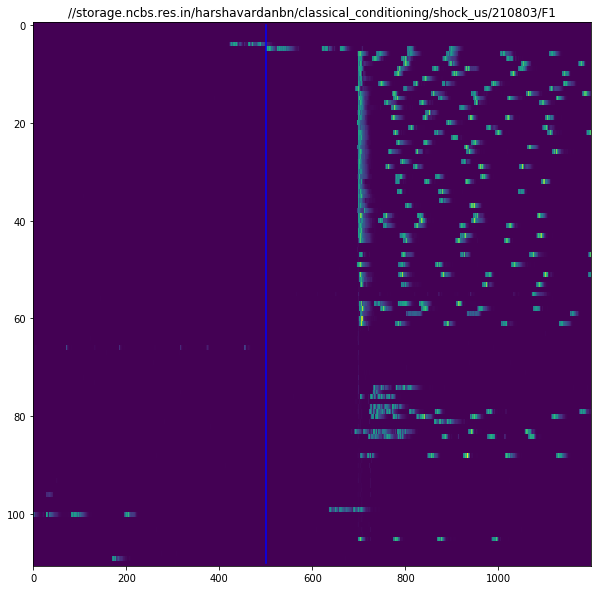

In [7]:
plt.figure(figsize = (10, 10))
plt.imshow(contrast, aspect = "auto")#, cmap = cm.Blues)
#plt.savefig("heatmap.png")
plt.title(location)
plt.plot([500, 500], [0, 110], "b")

In [8]:
avg = []
for i in range(1200):
    temp = 0
    for j in range(10):
        temp += motion[j][i]
    avg.append(temp / 10)

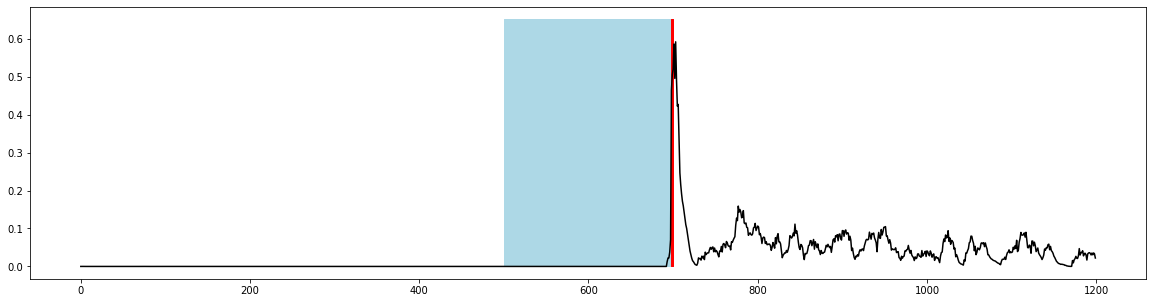

In [9]:
avg1 = []
for i in range(1200):
    temp = 0
    for j in range(6, 31):
        temp += motion[j][i]
    avg1.append(temp)

avg1 = np.array(avg1) / 25
maximum = max(avg1)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(pd.Series(avg1).rolling(1).mean(), "k")

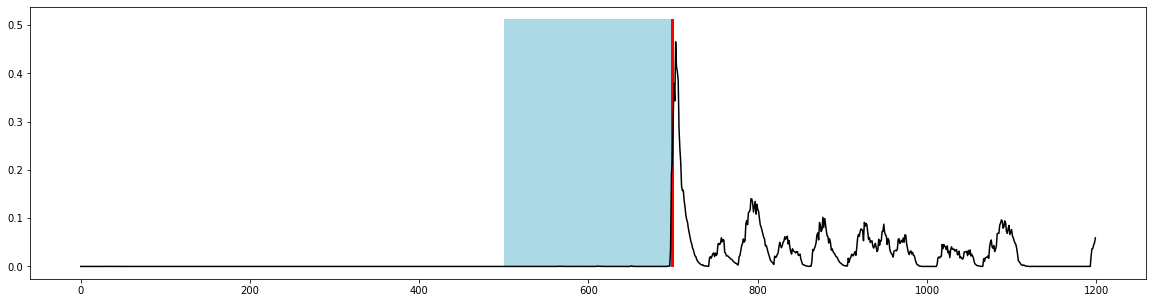

In [10]:
avg2 = []
for i in range(1200):
    temp = 0
    for j in range(31, 56):
        temp += motion[j][i]
    avg2.append(temp)

avg2 = np.array(avg2) / 25
maximum = max(avg2)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(pd.Series(avg2).rolling(1).mean(), "k")

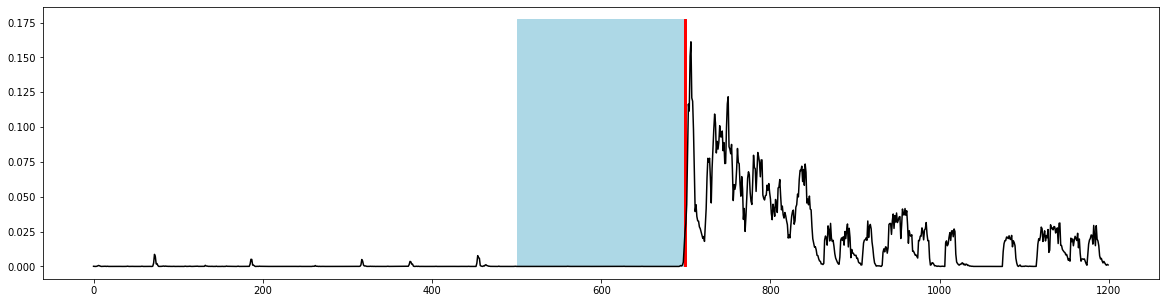

In [11]:
avg3 = []
for i in range(1200):
    temp = 0
    for j in range(56, 81):
        temp += motion[j][i]
    avg3.append(temp)

avg3 = np.array(avg3) / 25
maximum = max(avg3)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(avg3, "k")

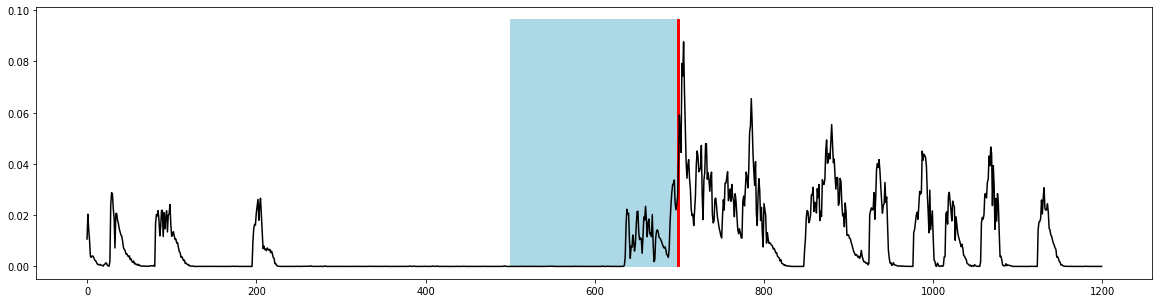

In [12]:
avg4 = []
for i in range(1200):
    temp = 0
    for j in range(81, 106):
        temp += motion[j][i]
    avg4.append(temp)

avg4 = np.array(avg4) / 25  
maximum = max(avg4)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(avg4, "k")

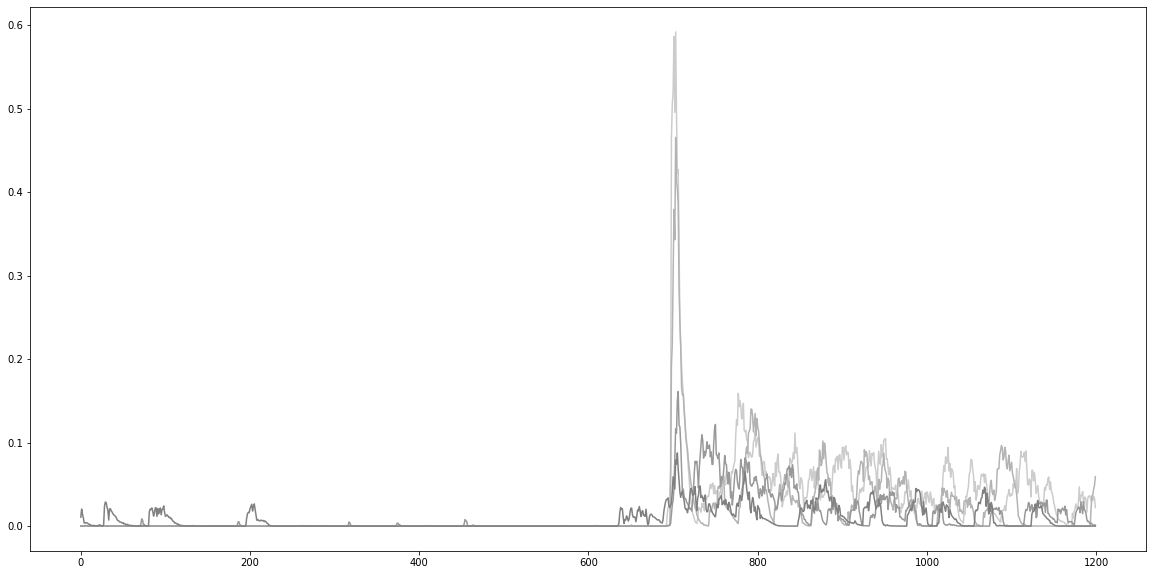

In [13]:
plt.figure(figsize = (20, 10))
plt.plot(avg1, "0.8")
plt.plot(avg2, "0.7")
plt.plot(avg3, "0.6")
plt.plot(avg4, "0.5")

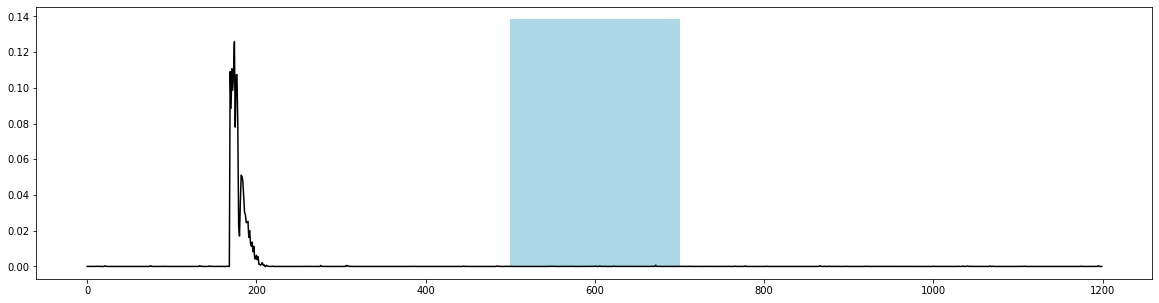

In [14]:
avg5 = []
for i in range(1200):
    temp = 0
    for j in range(106, 111):
        temp += motion[j][i]
    avg5.append(temp)

avg5 = np.array(avg5) / 5  
maximum = max(avg5)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.plot(avg5, "k")

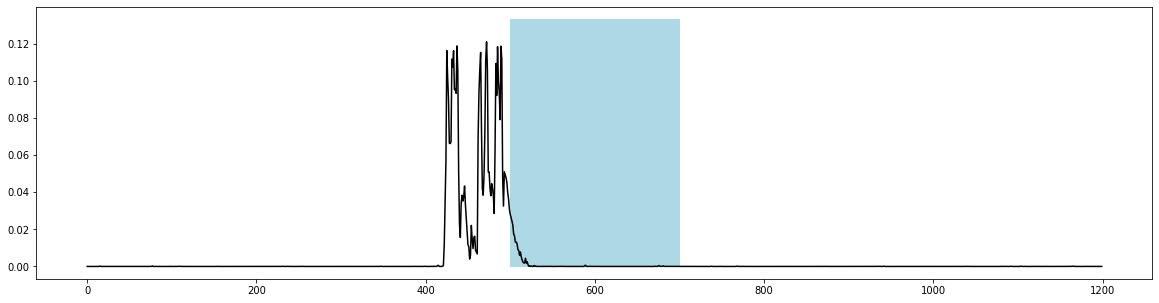

In [15]:
avg6 = []
for i in range(1200):
    temp = 0
    for j in range(0, 5):
        temp += motion[j][i]
    avg6.append(temp)

avg6 = np.array(avg6) / 5  
maximum = max(avg6)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.plot(avg6, "k")